In [51]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [1252]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [1481]:
df=pd.read_csv("C:/Users/djroc/Dropbox/My PC (LAPTOP-8JC4NERN)/Downloads/Bengaluru_House_Data.csv")

In [1482]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [1483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [1484]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [1485]:
df.drop(['society'],inplace=True,axis=1)

In [1486]:
import re
def fun(x):
    if(re.search('[a-zA-Z]', x)):
        print(x)

In [1487]:
df['total_sqft'].apply(lambda x:fun(x))

34.46Sq. Meter
4125Perch
1000Sq. Meter
1100Sq. Yards
5.31Acres
30Acres
716Sq. Meter
1500Sq. Meter
142.61Sq. Meter
1574Sq. Yards
361.33Sq. Yards
117Sq. Yards
3040Sq. Meter
500Sq. Yards
167Sq. Meter
315Sq. Yards
3Cents
188.89Sq. Yards
204Sq. Meter
45Sq. Yards
133.3Sq. Yards
78.03Sq. Meter
122Sq. Yards
84.53Sq. Meter
2.09Acres
24Guntha
697Sq. Meter
142.61Sq. Meter
1500Cents
132Sq. Yards
2Acres
1100Sq. Meter
15Acres
1.26Acres
151.11Sq. Yards
1Grounds
2940Sq. Yards
45.06Sq. Meter
1.25Acres
86.72Sq. Meter
38Guntha
6Acres
120Sq. Yards
24Sq. Meter
142.84Sq. Meter
300Sq. Yards


0        None
1        None
2        None
3        None
4        None
         ... 
13315    None
13316    None
13317    None
13318    None
13319    None
Name: total_sqft, Length: 13320, dtype: object

In [1488]:
def number(x):
    if(len(x.split(' - '))==2):
        a=float(x.split('-')[0].strip())
        b=float(x.split('-')[1].strip())
        return float((a+b)/2)
    elif 'Sq. Meter' in x:
        return int(float(x.split('Sq. Meter')[0].strip())*10)
    elif 'Sq. Yards' in x:
        return int(float(x.split('Sq. Yards')[0].strip())*9)
    elif 'Acres' in x:
        return int(float(x.split('Acres')[0].strip())*43560)
    elif 'Cents' in x:
        return int(float(x.split('Cents')[0].strip())*435)
    elif 'Guntha' in x:
        return int(float(x.split('Guntha')[0].strip())*1089)
    elif 'Grounds' in x:
        return int(float(x.split('Grounds')[0].strip())*2400)
    elif 'Perch' in x:
        return np.nan
    else:
        return int(float(x.strip()))
    

In [1489]:
df['size']=df['size'].str.split(' ',expand=True)[0].astype(np.number)
df.bath=df.bath.astype(np.number)
df.total_sqft=df['total_sqft'].apply(lambda x:number(x))

In [1490]:
df['size'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

In [1491]:
#filling null values in size column with the mode that is 2
df['size'].fillna(2.0,inplace=True)

In [1492]:
#filling null values in size column with the mode that is 2
df['bath'].fillna(2.0,inplace=True)

In [1493]:
#bed_to_bath=df.groupby(['size'])['bath'].agg(lambda x:x.value_counts().index[0])

In [1494]:
#import math
#for index,size,bath in zip(df.index,df['size'],df['bath']):
#    if math.isnan(bath):
#        df.iloc[index,4]=bed_to_bath[size]

In [1495]:
df.balcony.mode()

0    2.0
dtype: float64

In [1496]:
df['balcony'].fillna(2.0,inplace=True)

In [1497]:
df.dropna(inplace=True)

In [1498]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000


In [1500]:
def month_available(x):
    if x=='Ready To Move' or x=='Immediate Possession':
        return x
    
    return x.split('-')[1]

df['month_available']=df['availability'].apply(lambda x:month_available(x))

In [1502]:
def available(x):
    if x=='Ready To Move' or x=='Immediate Possession':
        return 1
    else:
        return 0
df['availability']=df['availability'].apply(lambda x:available(x))

In [1503]:
df.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,month_available
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606,Dec
1,Plot Area,1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615,Ready To Move
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556,Ready To Move
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861,Ready To Move
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000,Ready To Move


<AxesSubplot:xlabel='availability', ylabel='count'>

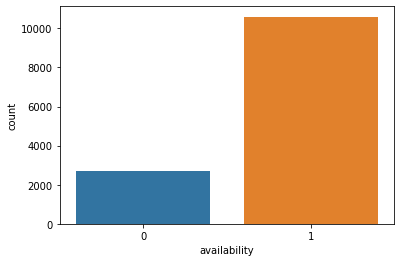

In [1504]:
#maximum houses are available
sn.countplot(df['availability'])

<AxesSubplot:xlabel='month_available', ylabel='count'>

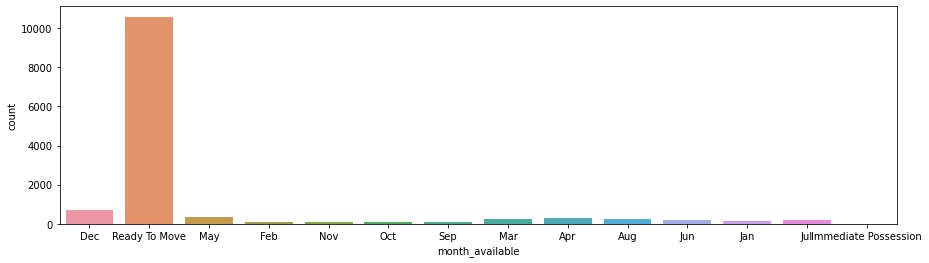

In [1509]:
plt.figure(figsize=(15,4))
sn.countplot(df['month_available'])

<AxesSubplot:xlabel='location'>

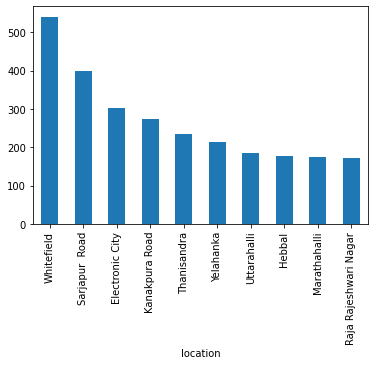

In [1499]:
#Most properties are in whitefield,sarjapur ,electronic city and kanakpura road locations
df.groupby('location')['location'].count().sort_values(ascending=False)[0:10].plot(kind='bar')

In [1623]:
df2=  df[((df) > (q3 + (1.5 * IQR))).any(axis=1)]

In [1624]:
df2.shape

(2578, 10)

In [1549]:
df1.shape

(10740, 10)

# Analysing houses upto 2.5cr,are upto 4BHK and having area upto 2500sqft

In [1545]:
df1=df.copy()

In [1134]:
df1.drop('price_per_sqft',axis=1,inplace=True)

In [1548]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
IQR

df1 = df[~((df) > (q3 + (1.5 * IQR))).any(axis=1)]
df2=  df[((df) > (q3 + (1.5 * IQR))).any(axis=1)]

df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,month_available
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606,Dec
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556,Ready To Move
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861,Ready To Move
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000,Ready To Move
5,Super built-up Area,1,Whitefield,2.0,1170.0,2.0,1.0,38.00,3247.863248,Ready To Move


In [1176]:
#df1[df1['total_sqft']<200].tail(10)

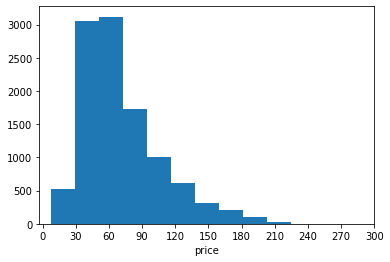

In [1140]:
#most houses are between 30 to 90 lacs
plt.hist(df1['price'])
plt.xlabel('price')
plt.xticks([0,30,60,90,120,150,180,210,240,270,300])
plt.show()

Text(0.5, 0, 'sqft')

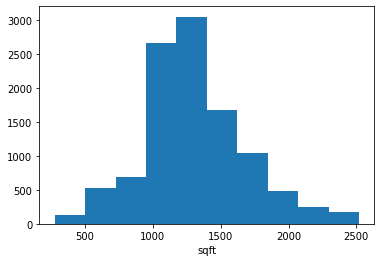

In [1141]:
#most houses are between 1000 sqft to 1500 sqft
plt.hist(df1['total_sqft'])
plt.xlabel('sqft')


Text(0.5, 0, 'price_per_sqft')

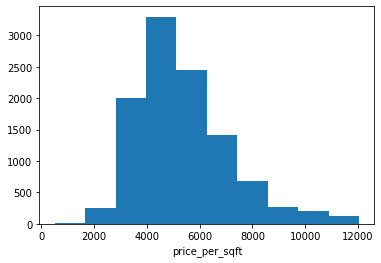

In [1143]:
#most houses are having price per sqft between 4000 sqft to 6000 sqft
plt.hist(df1['price_per_sqft'])
plt.xlabel('price_per_sqft')

Text(0, 0.5, 'count')

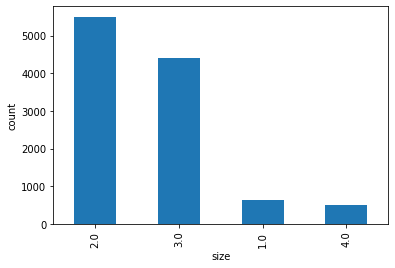

In [1115]:
#2BHK house are maximum followe by 3BHK 
#1BHK and 4BHK house are quite less
df1.groupby('size')['size'].count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('count')

<AxesSubplot:xlabel='bath'>

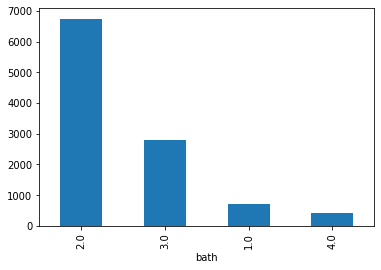

In [1229]:
#Houses with 2 bathrooms are maximum followed by 3,1,4
df1.groupby('bath')['bath'].count().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='size', ylabel='price_per_sqft'>

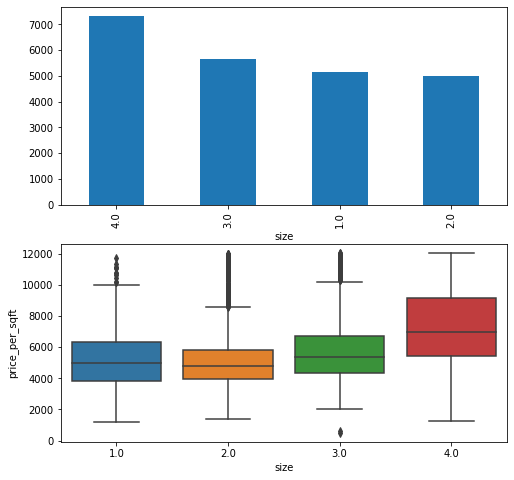

In [1256]:
#4 BHK house are having higher  avg price per sqft followed by 3BHK
#here we can see between 1BHK and 2BHK , 1BHK is having a slightly higher avg price per sqft.
figure, axis = plt.subplots(2, 1,figsize=(8,8))
df1.groupby('size')['price_per_sqft'].mean().sort_values(ascending=False).plot(kind='bar',ax=axis[0])
sn.boxplot(df1['size'],df1.price_per_sqft,ax=axis[1])

<AxesSubplot:xlabel='size', ylabel='total_sqft'>

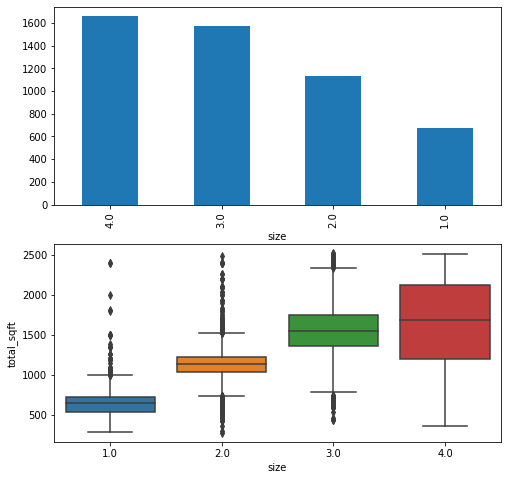

In [1257]:
#4 BHK house are having higher  avg area followed by 3BHK ,2BHK,1BHK
figure, axis = plt.subplots(2, 1,figsize=(8,8))
df1.groupby('size')['total_sqft'].mean().sort_values(ascending=False).plot(kind='bar',ax=axis[0])
sn.boxplot(df1['size'],df1.total_sqft,ax=axis[1])

<AxesSubplot:xlabel='bath', ylabel='price_per_sqft'>

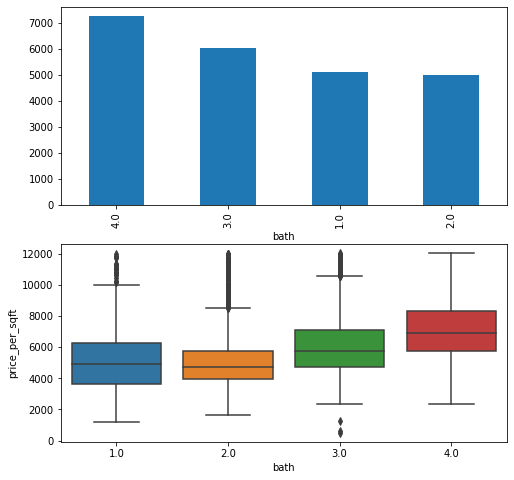

In [1258]:
#houses with 4 bathrooms are having higher  avg price per sqft followed by 3BHK
#here we can see between houses with 1 and 2 bathrooms, house with 1 bathroom is having a slightly higher avg price per sqft.
figure, axis = plt.subplots(2, 1,figsize=(8,8))
df1.groupby('bath')['price_per_sqft'].mean().sort_values(ascending=False).plot(kind='bar',ax=axis[0])
sn.boxplot(df1.bath,df1.price_per_sqft,ax=axis[1])

<AxesSubplot:xlabel='bath', ylabel='total_sqft'>

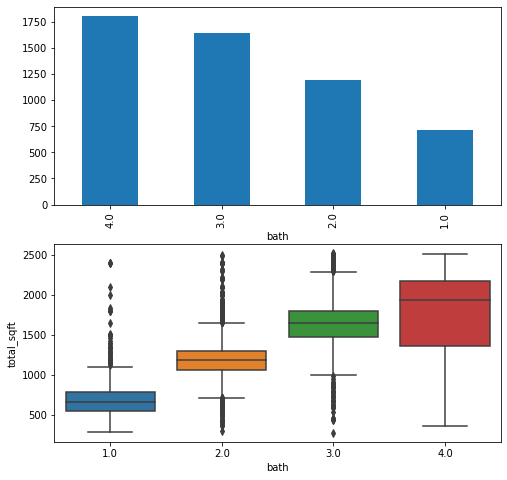

In [1259]:
#houses with 4 bathrooms  are having higher avg area followed by 3 ,2,1 bathrooms.
figure, axis = plt.subplots(2, 1,figsize=(8,8))
df1.groupby('bath')['total_sqft'].mean().sort_values(ascending=False).plot(kind='bar',ax=axis[0])
sn.boxplot(df1.bath,df1.total_sqft,ax=axis[1])

<AxesSubplot:xlabel='bath'>

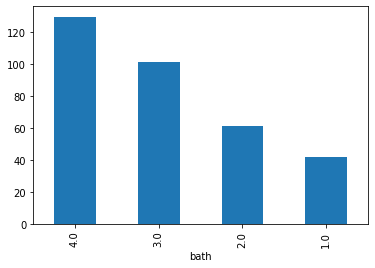

In [1121]:
#Mean price of 4bhk is maximum follweb by 3bhk,2bhk and 1bhk.
df1.groupby('bath')['price'].mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

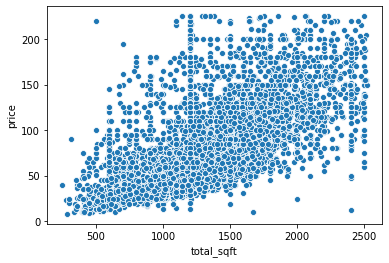

In [1122]:
#we can see there some sort of linear relaton beween price and area
sn.scatterplot(df1['total_sqft'],df1['price'])

<AxesSubplot:>

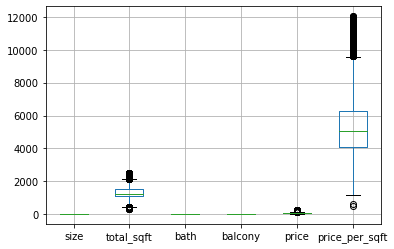

In [1142]:
df1.boxplot()

<AxesSubplot:xlabel='size'>

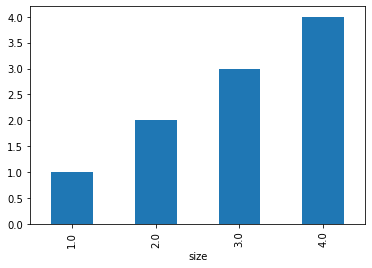

In [1124]:
#Maximum 1bhk houses are having 1 bath ,2bhk-2bath,3bhk-3bath,4bhk-4bath
df1.groupby(['size'])['bath'].agg(lambda x:x.value_counts().index[0]).plot(kind='bar')

<AxesSubplot:xlabel='area_type', ylabel='count'>

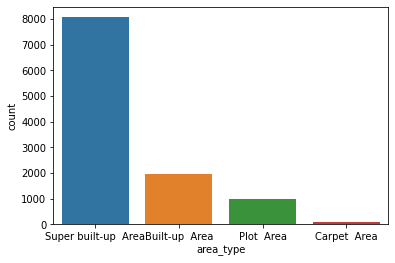

In [1104]:
sn.countplot(df1['area_type'])

<AxesSubplot:xlabel='area_type', ylabel='price_per_sqft'>

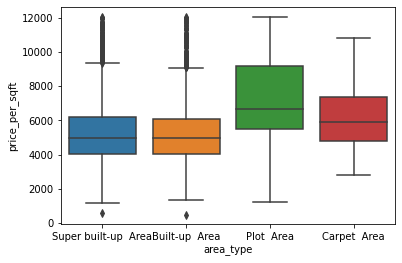

In [1151]:
sn.boxplot(x='area_type',y='price_per_sqft',data=df1)

Text(0, 0.5, 'total_sqft')

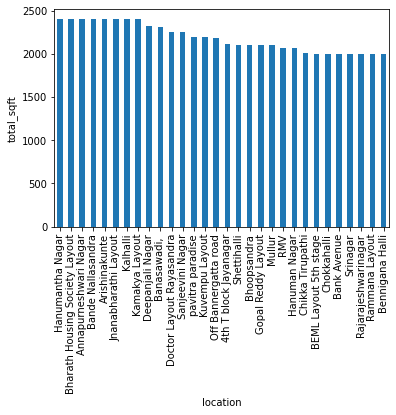

In [1261]:
#It look like big area houses are in Hanumantha Nagar,Bharath Housing Society Layout,Annapurneshwari Nagar,Bande Nallasandra ..
df1.groupby('location')['total_sqft'].mean().sort_values(ascending=False)[0:30].plot(kind='bar')
plt.ylabel("total_sqft")

<AxesSubplot:xlabel='location'>

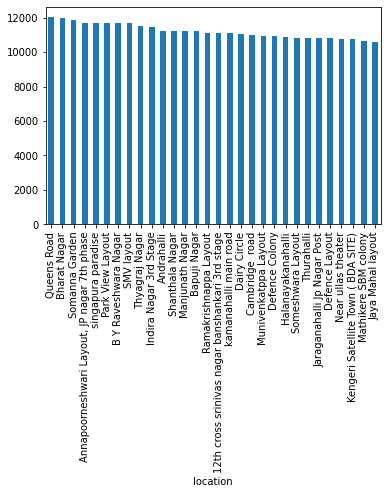

In [1170]:
#It look like areas like Queens Road ,Bharat Nagar,Somanna Garden are costlier areas
df1.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False)[0:30].plot(kind='bar')

In [1562]:
df1.drop(['availability','price_per_sqft','month_available'],inplace=True,axis=1)

In [1563]:
data_cat=df1.select_dtypes(exclude=np.number)
data_num=df1.select_dtypes(np.number)
data_cat=data_cat.reset_index()

In [1564]:
ss=StandardScaler()
data_num_scaled=pd.DataFrame(ss.fit_transform(data_num),columns=data_num.columns)
data_num_scaled=data_num_scaled.reset_index()
data_num_scaled.head()

,index,size,total_sqft,bath,balcony,price
0,0,-0.637609,-0.660015,-0.424817,-0.735616,-0.903626
1,1,0.892652,0.361273,-0.424817,1.856842,-0.260393
2,2,0.892652,0.576702,1.129179,-0.735616,0.665323
3,3,-0.637609,-0.277032,-0.424817,-0.735616,-0.568966
4,4,-0.637609,-0.356820,-0.424817,-0.735616,-0.933642


In [1565]:
data_scaled=pd.concat([data_num_scaled,data_cat],axis=1).drop('index',axis=1)
data_scaled.head()

,size,total_sqft,bath,balcony,price,area_type,location
0,-0.637609,-0.660015,-0.424817,-0.735616,-0.903626,Super built-up Area,Electronic City Phase II
1,0.892652,0.361273,-0.424817,1.856842,-0.260393,Built-up Area,Uttarahalli
2,0.892652,0.576702,1.129179,-0.735616,0.665323,Super built-up Area,Lingadheeranahalli
3,-0.637609,-0.277032,-0.424817,-0.735616,-0.568966,Super built-up Area,Kothanur
4,-0.637609,-0.356820,-0.424817,-0.735616,-0.933642,Super built-up Area,Whitefield


In [1566]:
# Reference Table For Displaying Reason for Selecting
data_encoded_refernce=pd.get_dummies(df1,columns=['area_type','location'])
data_encoded_refernce.head()

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Anekal,...,location_manyata tech park,location_mvj engineering college,location_pavitra paradise,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_singapura paradise,location_tc.palya,location_whitefiled
0,2.0,1056.0,2.0,1.0,39.07,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,2.0,3.0,62.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1521.0,3.0,1.0,95.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1200.0,2.0,1.0,51.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,1170.0,2.0,1.0,38.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1567]:
data_encoded_scaled=pd.get_dummies(data_scaled,columns=['area_type','location'])
data_encoded_scaled.head()

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Anekal,...,location_manyata tech park,location_mvj engineering college,location_pavitra paradise,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_singapura paradise,location_tc.palya,location_whitefiled
0,-0.637609,-0.660015,-0.424817,-0.735616,-0.903626,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.892652,0.361273,-0.424817,1.856842,-0.260393,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.892652,0.576702,1.129179,-0.735616,0.665323,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.637609,-0.277032,-0.424817,-0.735616,-0.568966,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.637609,-0.356820,-0.424817,-0.735616,-0.933642,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1568]:
d1 = data_encoded_scaled.copy()
data_cluster=data_encoded_refernce.copy()

In [1569]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(d1)
    ssd.append(kmeans.inertia_)

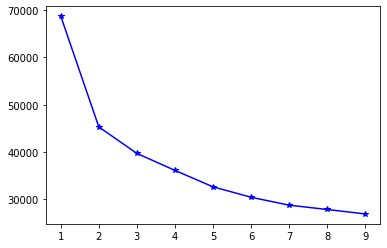

In [1570]:
plt.plot(range(1,10),ssd,marker='*',color='b')

In [1571]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data_encoded_refernce)
data_cluster['kmeans_cluster']=cluster_kmeans
data_cluster.head()

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Anekal,...,location_mvj engineering college,location_pavitra paradise,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_singapura paradise,location_tc.palya,location_whitefiled,kmeans_cluster
0,2.0,1056.0,2.0,1.0,39.07,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,2.0,3.0,62.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1521.0,3.0,1.0,95.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1200.0,2.0,1.0,51.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,1170.0,2.0,1.0,38.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1572]:
df1['cluster']=cluster_kmeans

In [1573]:
grouped_data = data_cluster.groupby(['kmeans_cluster']).mean().round(1)
grouped_data

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Anekal,...,location_manyata tech park,location_mvj engineering college,location_pavitra paradise,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_singapura paradise,location_tc.palya,location_whitefiled
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,
0,2.4,1253.5,2.2,1.6,64.4,0.2,0.0,0.1,0.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.1,1831.6,3.0,1.9,113.5,0.2,0.0,0.1,0.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.8,833.2,1.8,1.1,41.6,0.2,0.0,0.1,0.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1522]:
df1.groupby(['cluster'])['location'].agg(lambda x:x.value_counts().index[0])

cluster
0    Electronic City
1     Sarjapur  Road
2         Whitefield
Name: location, dtype: object

In [1417]:
df1.groupby(['cluster'])['size'].agg(lambda x:x.value_counts().index[0])

cluster
0    2.0
1    3.0
2    2.0
Name: size, dtype: float64

In [1516]:
df1.groupby(['cluster'])['balcony'].value_counts()

cluster  balcony
0        1.0        1343
         2.0         466
         0.0         286
         3.0          59
1        2.0        1388
         3.0         505
         1.0         482
         0.0         110
2        2.0        2644
         1.0        2507
         3.0         583
         0.0         337
Name: balcony, dtype: int64

In [1419]:
df1.groupby(['cluster'])['bath'].agg(lambda x:x.value_counts().index[0])

cluster
0    2.0
1    3.0
2    2.0
Name: bath, dtype: float64

In [947]:
df1.groupby(['cluster'])['area_type'].agg(lambda x:x.value_counts().index[0])

cluster
0    Super built-up  Area
1    Super built-up  Area
2    Super built-up  Area
Name: area_type, dtype: object

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

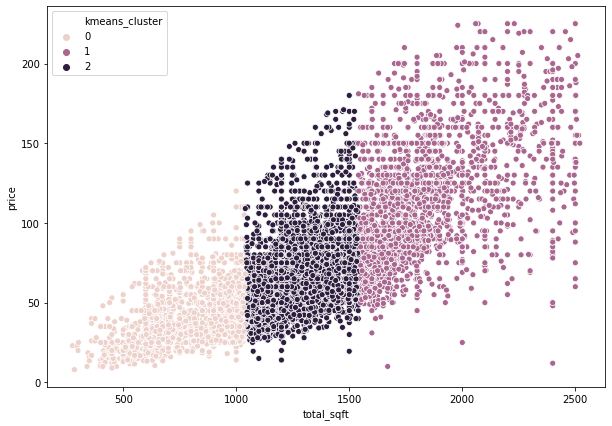

In [1215]:
plt.figure(figsize=(10, 7))  
sn.scatterplot(data_cluster['total_sqft'],data_cluster['price'], hue=data_cluster['kmeans_cluster']) 

In [911]:
data_cluster.groupby(['kmeans_cluster'])['bath'].agg(lambda x:x.value_counts().index[0])

kmeans_cluster
0    2.0
1    3.0
2    2.0
Name: bath, dtype: float64

In [918]:
data_cluster.groupby(['kmeans_cluster'])['total_sqft'].max()

kmeans_cluster
0    1535.0
1    2550.0
2    1017.0
Name: total_sqft, dtype: float64

In [ ]:
#UNDERSTANDING
#The first segment (0) of houses are houses which have an average price of 41 lacs(less expensive ),having 1-2 BHK homes,having 1-2 bathrooms,1-2 balcony,having avg area of 832.8(small) and are mostly in the electronic city of banglore 
#The second segment (2) of houses are houses which have an average price of 65 lacs(moderately expensive ),having 2-3 BHK homes,having 2-3 bathrooms,1-2 balcony,having avg area of 1252.9(medium) and are mostly in the Whitefield of banglore 
#The tird segment (1) of houses are houses which have an average price of 1 crore 13 lacs(expensive),having 3-4 BHK homes,having 2-3 bathrooms,2-3 balcony,having avg area of 1829.7(large) and are mostly in the electronic city of banglore 

In [1540]:
df.shape

(13318, 10)

In [1574]:
df1.shape

(10740, 8)

In [1543]:
df2.shape

(2578, 10)

# ANALYZING VERY EXPENSIVE HOUSES AND BIG HOUSES

In [1626]:
df2.describe()

,availability,size,total_sqft,bath,balcony,price,price_per_sqft
count,2578.000000,2578.000000,2.578000e+03,2578.000000,2578.000000,2578.000000,2.578000e+03
mean,0.871606,4.408844,4.004330e+03,4.416990,1.752521,284.503051,1.854496e+04
std,0.334593,1.914254,3.237191e+04,1.953151,0.908313,269.662790,2.412308e+05
min,0.000000,1.000000,1.000000e+00,1.000000,0.000000,23.000000,2.257423e+00
25%,1.000000,3.000000,1.200000e+03,3.000000,1.000000,150.000000,7.468217e+03
50%,1.000000,4.000000,2.400000e+03,4.000000,2.000000,225.000000,1.171484e+04
75%,1.000000,5.000000,3.347250e+03,5.000000,2.000000,325.000000,1.549824e+04
max,1.000000,43.000000,1.306800e+06,40.000000,3.000000,3600.000000,1.200000e+07


In [1631]:
#df2.loc[(df2['area_type']=='Plot  Area')].head(30)

In [1628]:
df2['area_type'].value_counts()

Plot  Area              1286
Super built-up  Area     776
Built-up  Area           506
Carpet  Area              10
Name: area_type, dtype: int64

In [1616]:
df2.loc[(df2['price']>700) & (df2['total_sqft']>7000)]

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,month_available
408,Super built-up Area,0,Rajaji Nagar,7.0,12000.0,6.0,3.0,2200.0,18333.333333,Jan
605,Super built-up Area,0,Malleshwaram,7.0,12000.0,7.0,3.0,2200.0,18333.333333,Jan
1234,Plot Area,1,Siddapura,4.0,14000.0,3.0,2.0,800.0,5714.285714,Ready To Move
2620,Super built-up Area,1,Sathya Sai Layout,6.0,11338.0,9.0,1.0,1000.0,8819.897689,Ready To Move
2623,Plot Area,0,Dodsworth Layout,4.0,30000.0,4.0,2.0,2100.0,7000.000000,Jul
3180,Super built-up Area,1,Shanthala Nagar,5.0,8321.0,5.0,3.0,2700.0,32448.023074,Ready To Move
4243,Plot Area,0,Hunasamaranahalli,4.0,7500.0,4.0,2.0,900.0,12000.000000,Mar
4929,Plot Area,0,Yemlur,8.0,12000.0,9.0,2.0,1900.0,15833.333333,May
4963,Super built-up Area,0,Malleshwaram,5.0,7500.0,7.0,3.0,1700.0,22666.666667,Jan
6838,Super built-up Area,0,Rajaji Nagar,5.0,7500.0,8.0,3.0,1700.0,22666.666667,Jan


In [1635]:
df2=df2[~(df2['total_sqft']/df2['size']<150)]

In [1608]:
df2.describe()

,availability,size,total_sqft,bath,balcony,price,price_per_sqft
count,2578.000000,2578.000000,2.578000e+03,2578.000000,2578.000000,2578.000000,2.578000e+03
mean,0.871606,4.408844,4.004330e+03,4.416990,1.752521,284.503051,1.854496e+04
std,0.334593,1.914254,3.237191e+04,1.953151,0.908313,269.662790,2.412308e+05
min,0.000000,1.000000,1.000000e+00,1.000000,0.000000,23.000000,2.257423e+00
25%,1.000000,3.000000,1.200000e+03,3.000000,1.000000,150.000000,7.468217e+03
50%,1.000000,4.000000,2.400000e+03,4.000000,2.000000,225.000000,1.171484e+04
75%,1.000000,5.000000,3.347250e+03,5.000000,2.000000,325.000000,1.549824e+04
max,1.000000,43.000000,1.306800e+06,40.000000,3.000000,3600.000000,1.200000e+07


<AxesSubplot:xlabel='total_sqft'>

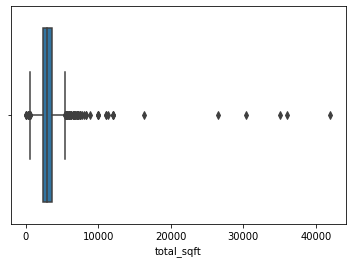

In [1621]:
sn.boxplot(df2.loc[~(df2['area_type']=='Plot  Area'),'total_sqft'])


<AxesSubplot:xlabel='price_per_sqft'>

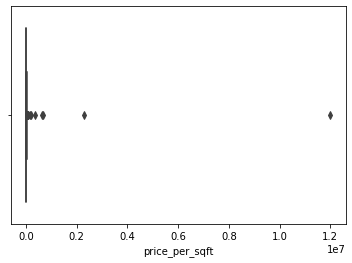

In [1607]:
sn.boxplot(df2['price_per_sqft'])

In [1639]:
q_1 = df2['price_per_sqft'].quantile(0.25)
q_3 = df2['price_per_sqft'].quantile(0.75)
IQR_ = q_3-q_1
IQR_

df2[~((df2['price_per_sqft']) > (q_3 + (1.5 * IQR_)))]


,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,month_available
1,Plot Area,1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.0,4615.384615,Ready To Move
6,Super built-up Area,0,Old Airport Road,4.0,2732.0,4.0,2.0,204.0,7467.057101,May
7,Super built-up Area,1,Rajaji Nagar,4.0,3300.0,4.0,2.0,600.0,18181.818182,Ready To Move
11,Plot Area,1,Whitefield,4.0,2785.0,5.0,3.0,295.0,10592.459605,Ready To Move
18,Super built-up Area,1,Ramakrishnappa Layout,3.0,2770.0,4.0,2.0,290.0,10469.314079,Ready To Move
...,...,...,...,...,...,...,...,...,...,...
13303,Plot Area,1,Vidyaranyapura,5.0,774.0,5.0,3.0,70.0,9043.927649,Ready To Move
13311,Plot Area,1,Ramamurthy Nagar,7.0,1500.0,9.0,2.0,250.0,16666.666667,Ready To Move
13315,Built-up Area,1,Whitefield,5.0,3453.0,4.0,0.0,231.0,6689.834926,Ready To Move
13316,Super built-up Area,1,Richards Town,4.0,3600.0,5.0,2.0,400.0,11111.111111,Ready To Move


In [1636]:
df2[(df2['total_sqft']>12500)]

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,month_available
674,Built-up Area,1,Yelahanka,3.0,35000.0,3.0,3.0,130.0,371.428571,Ready To Move
1019,Plot Area,0,Marathi Layout,1.0,231303.0,1.0,0.0,110.0,47.556668,Mar
1086,Plot Area,0,Narasapura,2.0,1306800.0,2.0,2.0,29.5,2.257423,Mar
1234,Plot Area,1,Siddapura,4.0,14000.0,3.0,2.0,800.0,5714.285714,Ready To Move
1712,Plot Area,1,Singena Agrahara,3.0,15000.0,3.0,1.0,95.0,633.333333,Ready To Move
1821,Plot Area,1,Sarjapur,3.0,14166.0,3.0,1.0,76.0,536.495835,Ready To Move
1894,Plot Area,1,Nelamangala,3.0,52272.0,2.0,1.0,140.0,267.829813,Ready To Move
2623,Plot Area,0,Dodsworth Layout,4.0,30000.0,4.0,2.0,2100.0,7000.000000,Jul
3228,Built-up Area,1,Dodda Banaswadi,5.0,30400.0,5.0,1.0,140.0,460.526316,Ready To Move
5393,Super built-up Area,1,Doddabommasandra,9.0,42000.0,8.0,3.0,175.0,416.666667,Ready To Move


In [1581]:
df2.drop(['price_per_sqft','availability','month_available'],axis=1,inplace=True)

In [1582]:
df2=df2[~(df2['size']>=10)]
df2=df2[~(df2['bath']>=10)]
df2=df2[~(df2['total_sqft']>12500)]

In [1376]:
data_cat1=df2.select_dtypes(exclude=np.number)
data_num1=df2.select_dtypes(np.number)
data_cat1=data_cat1.reset_index()

In [1377]:
ss1=StandardScaler()
data_num_scaled1=pd.DataFrame(ss1.fit_transform(data_num1),columns=data_num1.columns)
data_num_scaled1=data_num_scaled1.reset_index()
data_num_scaled1.head()

,index,size,total_sqft,bath,balcony,price
0,0,-0.139733,-0.016614,0.507098,1.382239,-0.651831
1,1,-0.139733,0.067900,-0.177704,0.280679,-0.334357
2,2,-0.139733,0.431569,-0.177704,0.280679,1.162301
3,3,1.296210,-1.028228,1.191901,0.280679,0.293030
4,4,-0.139733,0.101834,0.507098,1.382239,0.009572


In [1378]:
data_scaled1=pd.concat([data_num_scaled1,data_cat1],axis=1).drop('index',axis=1)
data_scaled1.head()

,size,total_sqft,bath,balcony,price,area_type,location
0,-0.139733,-0.016614,0.507098,1.382239,-0.651831,Plot Area,Chikka Tirupathi
1,-0.139733,0.067900,-0.177704,0.280679,-0.334357,Super built-up Area,Old Airport Road
2,-0.139733,0.431569,-0.177704,0.280679,1.162301,Super built-up Area,Rajaji Nagar
3,1.296210,-1.028228,1.191901,0.280679,0.293030,Plot Area,Gandhi Bazar
4,-0.139733,0.101834,0.507098,1.382239,0.009572,Plot Area,Whitefield


In [1379]:
# Reference Table For Displaying Reason for Selecting
data_encoded_refernce1=pd.get_dummies(df2,columns=['area_type','location'])
data_encoded_refernce1.head()

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Devarachikkanahalli,...,"location_asha township, off hennur road","location_beml layout, basaveshwara nagar",location_bsk 6th stage 2ad block near sri conversation hall,location_frazertown,location_near Ramanashree California resort,location_poornaprajna layout,location_sarjapura main road,location_t.c palya,location_vinayakanagar,"location_white field,kadugodi"
1,4.0,2600.0,5.0,3.0,120.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4.0,2732.0,4.0,2.0,204.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,4.0,3300.0,4.0,2.0,600.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,6.0,1020.0,6.0,2.0,370.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,4.0,2785.0,5.0,3.0,295.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1380]:
data_encoded_scaled1=pd.get_dummies(data_scaled1,columns=['area_type','location'])
data_encoded_scaled1.head()


,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Devarachikkanahalli,...,"location_asha township, off hennur road","location_beml layout, basaveshwara nagar",location_bsk 6th stage 2ad block near sri conversation hall,location_frazertown,location_near Ramanashree California resort,location_poornaprajna layout,location_sarjapura main road,location_t.c palya,location_vinayakanagar,"location_white field,kadugodi"
0,-0.139733,-0.016614,0.507098,1.382239,-0.651831,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.139733,0.067900,-0.177704,0.280679,-0.334357,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.139733,0.431569,-0.177704,0.280679,1.162301,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.296210,-1.028228,1.191901,0.280679,0.293030,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.139733,0.101834,0.507098,1.382239,0.009572,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1381]:
d2 = data_encoded_scaled1.copy()
data_cluster1=data_encoded_refernce1.copy()

In [1382]:
ssd1 = []
for k in range(1,10):
    kmeans1 = KMeans(n_clusters=k,random_state=4)
    kmeans1.fit(d2)
    ssd1.append(kmeans1.inertia_)

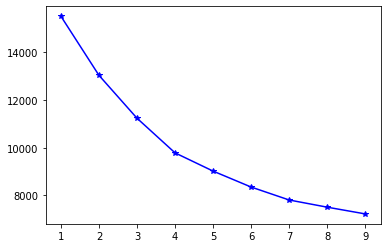

In [1383]:
plt.plot(range(1,10),ssd1,marker='*',color='b')

In [1622]:
model1=KMeans(n_clusters=3,random_state=10)
cluster_kmeans1=model1.fit_predict(data_encoded_refernce1)
data_cluster1['kmeans_cluster']=cluster_kmeans1
data_cluster1.head()

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Devarachikkanahalli,...,"location_beml layout, basaveshwara nagar",location_bsk 6th stage 2ad block near sri conversation hall,location_frazertown,location_near Ramanashree California resort,location_poornaprajna layout,location_sarjapura main road,location_t.c palya,location_vinayakanagar,"location_white field,kadugodi",kmeans_cluster
1,4.0,2600.0,5.0,3.0,120.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4.0,2732.0,4.0,2.0,204.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,4.0,3300.0,4.0,2.0,600.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,6.0,1020.0,6.0,2.0,370.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11,4.0,2785.0,5.0,3.0,295.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='total_sqft', ylabel='price'>

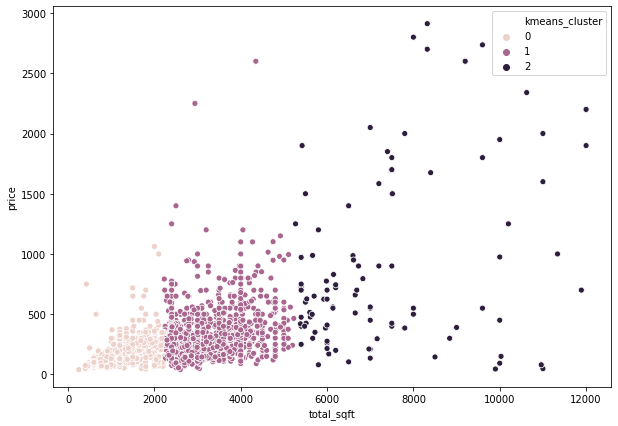

In [1402]:
plt.figure(figsize=(10, 7))  
sn.scatterplot(data_cluster1['total_sqft'],data_cluster1['price'], hue=data_cluster1['kmeans_cluster']) 

In [1403]:
grouped_data1 = data_cluster1.groupby(['kmeans_cluster']).mean().round(1)
grouped_data1

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Devarachikkanahalli,...,"location_asha township, off hennur road","location_beml layout, basaveshwara nagar",location_bsk 6th stage 2ad block near sri conversation hall,location_frazertown,location_near Ramanashree California resort,location_poornaprajna layout,location_sarjapura main road,location_t.c palya,location_vinayakanagar,"location_white field,kadugodi"
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,
0,4.2,1270.6,4.0,1.6,186.2,0.1,0.0,0.7,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.2,3202.0,4.4,1.8,319.2,0.3,0.0,0.3,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.5,7381.4,4.9,1.9,895.7,0.1,0.0,0.5,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1388]:
data_cluster1.groupby(['kmeans_cluster'])['total_sqft'].max()

kmeans_cluster
0     5230.0
1     2240.0
2    12000.0
Name: total_sqft, dtype: float64

In [1390]:
data_cluster1.groupby(['kmeans_cluster'])['size'].agg(lambda x:x.value_counts().index[0])

kmeans_cluster
0    4.0
1    4.0
2    4.0
Name: size, dtype: float64

In [1397]:
data_cluster1.groupby(['kmeans_cluster'])['size'].value_counts()

kmeans_cluster  size
0               4.0     724
                3.0     302
                5.0     130
                6.0      70
                7.0      35
                8.0      22
                9.0      15
                2.0      10
                1.0       4
1               4.0     230
                3.0     207
                5.0     178
                6.0     109
                2.0      86
                7.0      39
                1.0      35
                8.0      35
                9.0       7
2               4.0      50
                5.0      26
                3.0       9
                7.0       6
                1.0       3
                2.0       3
                6.0       3
                8.0       3
                9.0       2
Name: size, dtype: int64

<AxesSubplot:xlabel='size', ylabel='count'>

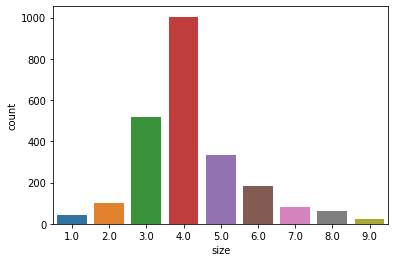

In [1392]:
sn.countplot(df2['size'])

In [1395]:
df2[df2['size']==4]

,area_type,location,size,total_sqft,bath,balcony,price
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.0
6,Super built-up Area,Old Airport Road,4.0,2732.0,4.0,2.0,204.0
7,Super built-up Area,Rajaji Nagar,4.0,3300.0,4.0,2.0,600.0
11,Plot Area,Whitefield,4.0,2785.0,5.0,3.0,295.0
22,Plot Area,Thanisandra,4.0,2800.0,5.0,2.0,380.0
...,...,...,...,...,...,...,...
13293,Super built-up Area,Sarjapur Road,4.0,2425.0,5.0,1.0,195.0
13299,Super built-up Area,Whitefield,4.0,2856.0,5.0,0.0,154.5
13306,Plot Area,Rajarajeshwari Nagara,4.0,1200.0,5.0,2.0,325.0
13316,Super built-up Area,Richards Town,4.0,3600.0,5.0,2.0,400.0
